## Funnel Metadynamics Simulation 

## Description

This notebook provides a comprehensive guide on running molecular dynamics simulations for a protein-ligand system, as well as conducting funnel metadynamics simulations and subsequent analysis. The content is structured to offer clear instructions and insights into each step of the simulation process. Starting with the setup of the molecular dynamics simulation environment, it covers the preparation of input files, parameterization, and execution of simulations. Additionally, the notebook demonstrates how to implement funnel metadynamics to explore complex energy landscapes and enhance sampling efficiency. 


## Author Information

- **Name:** Vithurshan Varenthirarajah
- **Email:** vvarenth@uwyo.edu

## Main Reference
Raniolo, Stefano, and Vittorio Limongelli. "Ligand binding free-energy calculations with funnel metadynamics." Nature Protocols 15, no. 9 (2020): 2837-2866.

# To follow this tutorial, ensure you have completed the following steps.

### In order to create and activate the conda environment, Open your terminal and type the following commands directly into the terminal.

    1. If you are using ARCC, use the following command to load the module miniconda - "module load miniconda3/23.11.0".  If you are on your local computer, ensure Anaconda is installed.

    2. On ARCC, activate conda environment with "conda activate /pfs/tc1/project/biocompworkshop/software/conda-envs/biocomp-day3"

    3. If you are using it on your local computer, Create the conda environment by using the command "conda env create -f requirments.yml" - This will set up the environment based on the specifications in the requirements.yml file.

        - Activate execute the command "conda activate biocomworkshop" - it will activate your conda environment
    
    4. open the jypyter notebook by using the command "jupyter-notebook" - This will launch Jupyter Notebook in your default browser.

## Setting up the Environment

In [1]:
import os

# path of image folder
Image_dir = f'{os.getcwd()}/Image'
Image_dir

'/pfs/tc1/project/biocompworkshop/vvarenth/Final-06-11/FM/Image'

In [2]:
# Add the directory to the PATH environment variable
os.environ['PATH'] += os.pathsep + "/pfs/tc1/project/biocompworkshop/software/conda-envs/biocomp-day3/bin"

In [3]:
!gmx 

                         :-) GROMACS - gmx, 2018.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS develo

In [4]:
!which plumed

/pfs/tc1/project/biocompworkshop/software/conda-envs/biocomp-day3/bin/plumed


In [5]:
!which gmx

/pfs/tc1/project/biocompworkshop/software/conda-envs/biocomp-day3/bin/gmx


In [6]:
# printing current working directory
!pwd

/pfs/tc1/project/biocompworkshop/vvarenth/Final-06-11/FM


In [7]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Import Packages


In [8]:
import MDAnalysis as mda
import numpy as np
import nglview as ng
import matplotlib.pyplot as plt
import plumed

### **Input File Preparation**

In general, MD simulations rely on 1) a set of atomic coordinates of all atoms on a simulation box and 2) a set of force field parameters that describes the interaction energies between atoms.

In terms of GROMACS inputs, we will need:

*   A <b>.gro</b> file containing a set of atomic coordinates.
*   The respective <b>.top</b> file containing the system topology.

In this notebook, we will simulate Chymotrypsin (PDB 4cha with its substrate (ligand) .

Chymotrypsin is a digestive enzyme synthesized in the pancreas. It plays an essential role in proteolysis, which is the breakdown of proteins and polypeptides. As a component of pancreatic juice, chymotrypsin aids in the digestion of proteins in the duodenum by preferentially cleaving peptide amide bonds. Specifically, it targets peptide bonds where the amino acid N-terminal to the bond is a tryptophan, tyrosine, phenylalanine, or leucine.

The **RCSB Protein Data Bank (RCSB PDB) server** is a freely accessible archive for experimentally determined structures of biological molecules, such as proteins and nucleic acids. It's a central resource for researchers in fields like molecular biology, biochemistry, and medicine.

Proteins are the building blocks of life. They are complex molecules found in all living things and play a crucial role in nearly every biological process. 

## **Proteins:**

* **Made from Amino Acids:** Proteins are long chains of smaller molecules called amino acids. Think of proteins as long necklaces, and amino acids are the individual beads.
  
* **Variety and Function:** There are 20 different types of amino acids, each with a unique side chain that gives it specific properties. The order and combination of these amino acids determine the unique shape and function of each protein.
* **Essential Roles:** Proteins have diverse functions. They can act as enzymes (speeding up chemical reactions), transport molecules across cell membranes, provide structural support for tissues, and even function as antibodies in the immune system.

## **Amino Acids:**

* **Building Blocks:** As mentioned earlier, amino acids are the building blocks of proteins. Each amino acid has a central carbon atom bonded to an amino group (NH2), a carboxyl group (COOH), a hydrogen atom (H), and a side chain (R group) that differs between each amino acid.
* **Side Chain Variations:** The side chain (R group) is the key to an amino acid's unique properties. These side chains can be large or small, charged or neutral, hydrophobic (water-fearing) or hydrophilic (water-loving). These variations influence how amino acids interact with each other and determine how proteins fold into their specific shapes.


## The 20 Most Abundant Naturally Occurring Amino Acids.
1. Ala - Alanine
2. Arg - Arginine
3. Asn - Asparagine
4. Asp - Aspartic acid
5. Cys - Cysteine
6. Glu - Glutamic acid
7. Gln - Glutamine
8. Gly - Glycine
9. His - Histidine
10. Ile - Isoleucine
11. Leu - Leucine
12. Lys - Lysine
13. Met - Methionine
14. Phe - Phenylalanine
15. Pro - Proline
16. Ser - Serine
17. Thr - Threonine
18. Trp - Tryptophan
19. Tyr - Tyrosine
20. Val - Valine


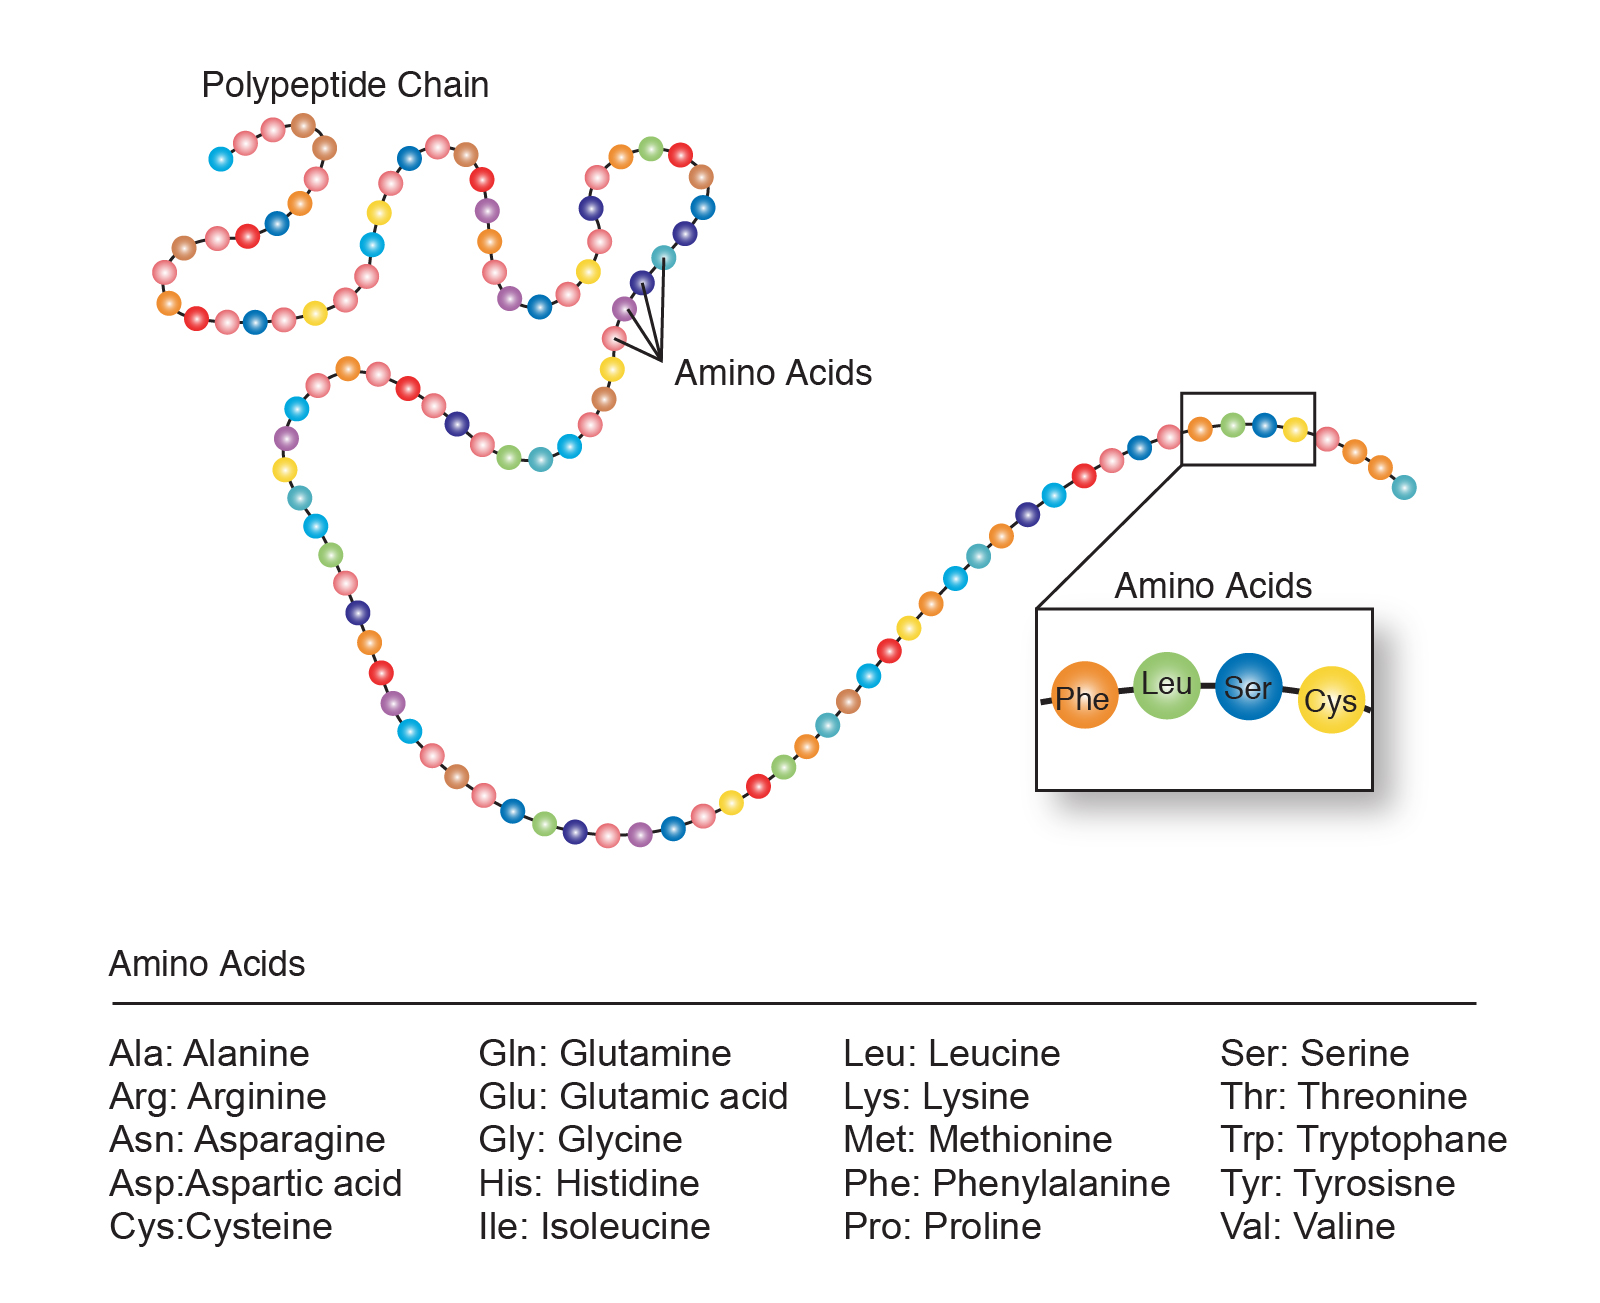

In [10]:
from IPython.display import Image

Image(f"{Image_dir}/amino_acids.jpg")


## https://www.genome.gov/genetics-glossary/Amino-Acids

In [ ]:
## Downloading pdb file from rscb server
!wget https://files.rcsb.org/download/4cha.pdb

--2024-06-09 06:53:05--  https://files.rcsb.org/download/4cha.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.159.157
Connecting to files.rcsb.org (files.rcsb.org)|128.6.159.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘4cha.pdb’

4cha.pdb                [ <=>                ] 329.77K  1.75MB/s    in 0.2s    

2024-06-09 06:53:06 (1.75 MB/s) - ‘4cha.pdb’ saved [337689]



In [ ]:
cat 4cha.pdb

HEADER    HYDROLASE (SERINE PROTEINASE)           26-NOV-84   4CHA              
TITLE     STRUCTURE OF ALPHA-*CHYMOTRYPSIN REFINED AT 1.68 ANGSTROMS RESOLUTION 
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: ALPHA-CHYMOTRYPSIN A;                                      
COMPND   3 CHAIN: A, E;                                                         
COMPND   4 EC: 3.4.21.1;                                                        
COMPND   5 MOL_ID: 2;                                                           
COMPND   6 MOLECULE: ALPHA-CHYMOTRYPSIN A;                                      
COMPND   7 CHAIN: B, F;                                                         
COMPND   8 EC: 3.4.21.1;                                                        
COMPND   9 MOL_ID: 3;                                                           
COMPND  10 MOLECULE: ALPHA-CHYMOTRYPSIN A;                                      
COMPND  11 CHAIN: C, G;     

In [ ]:
# Visualizing the downloaded pdb file with ngview package. 
view = ng.show_structure_file("4cha.pdb")
view

NGLWidget()

In [ ]:
# Cleaning pdb 
pdb_id = '4cha'
molecule = mda.Universe(f"{pdb_id}.pdb")
protein_atoms = molecule.select_atoms("protein") # only protein atoms
protein_atoms = protein_atoms.select_atoms('segid A B C') # extracting monomer structure.
protein_atoms.write("4cha_cleaned.pdb") # writing a pdb file which has only protein monomer structure.

In [ ]:
cat 4cha_cleaned.pdb

HEADER    HYDROLASE (SERINE PROTEINASE)           26-NOV-84   4CHA
TITLE     MDANALYSIS FRAME 0: Created by PDBWriter
COMPND    MOL_ID: 1;
COMPND    2 MOLECULE: ALPHA-CHYMOTRYPSIN A;
COMPND    3 CHAIN: A, E;
COMPND    4 EC: 3.4.21.1;
COMPND    5 MOL_ID: 2;
COMPND    6 MOLECULE: ALPHA-CHYMOTRYPSIN A;
COMPND    7 CHAIN: B, F;
COMPND    8 EC: 3.4.21.1;
COMPND    9 MOL_ID: 3;
COMPND    10 MOLECULE: ALPHA-CHYMOTRYPSIN A;
COMPND    11 CHAIN: C, G;
COMPND    12 EC: 3.4.21.1
REMARK     1
REMARK     1 REFERENCE 1
REMARK     1  AUTH   D.M.BLOW
REMARK     1  TITL   STRUCTURE AND MECHANISM OF CHYMOTRYPSIN
REMARK     1  REF    ACC.CHEM.RES.                 V.   9   145 1976
REMARK     1  REFN                   ISSN 0001-4842
REMARK     1 REFERENCE 2
REMARK     1  AUTH   B.S.HARTLEY
REMARK     1  TITL   THE ACTIVE CENTERS OF SERINE PROTEINASES
REMARK     1  REF    ANN.N.Y.ACAD.SCI.             V. 227   438 1974
REMARK     1  REFN                   ISSN 0077-8923
REMARK     1 REFERENCE 3
REMARK     1

In [ ]:

# Load the structure
view2 = ng.show_structure_file("4cha_cleaned.pdb")
# Remove representation
view2.clear_representations()
# Change the representation to cartoon
view2.add_representation('cartoon')
# Display the view
view2


**Eg: [ALA]1:A**

**[ALA]**: Represents the three-letter code for the amino acid Alanine.

**1**: This indicate the residue number within the protein sequence (Every amino acid in a protein chain has a specific position or residue number)

**A**: This refer to the chain identifier. In protein structures with multiple polypeptide chains, each chain is assigned a unique identifier, often a letter like "A", "B", "C", etc.

## Ligand Preparation

## Generating a Topology

Now we have verified that all the necessary atoms are present and the PDB file contains only protein atoms, and is ready to be input into GROMACS. 
The first GROMACS tool, we use, is <b>gmx pdb2gmx</b>. The purpose of gmx pdb2gmx is to generate three files:

* <b>The topology for the molecule.</b>
* <b>A position restraint file.</b>
* <b>A post-processed structure file.</b>

The topology (topol.top by default) contains all the information necessary to define the molecule within a simulation. This information includes nonbonded parameters (atom types and charges) as well as bonded parameters (bonds, angles, dihedrals and atom connectivity).

In [14]:
# Getting Chain Information
chains = protein_atoms.select_atoms("protein").segments
for chain in chains:
    print("Chain ID:", chain.segid)

Chain ID: A
Chain ID: B
Chain ID: C


**gmx pdb2gmx** - This is a command within the Gromacs software suite used for processing protein structures.

**-f complex.pdb**: This argument specifies the input file (complex.pdb). 

**-o processed_4cha_cleaned.gro**: This argument specifies the output file (processed_4cha_cleaned.gro). The .gro extension indicates a Gromacs trajectory file format used to store the positions and velocities of atoms in a molecular system. 

**-ignh**: This flag tells pdb2gmx to ignore hydrogens in the input PDB file. Hydrogens are often not explicitly included in PDB files due to their small size, and this flag instructs the program to add them based on the protein structure information.

**-water tip3p**: This option specifies the water model to be used. Here, tip3p refers to a specific water model commonly employed in molecular simulations.

**-ff charmm36-jul2022**: This argument defines the force field to be used. A force field defines the physical interactions between atoms in a molecular system. Here, charmm36-jul2022 refers to the CHARMM force field (developed by the Chemistry at Harvard Macromolecular Mechanics lab) specifically from July 2022.

In [4]:
!gmx pdb2gmx -f complex.pdb -o processed_4cha_cleaned.gro -ignh -water tip3p -ff charmm36-jul2022
# !gmx pdb2gmx -f 4cha_cleaned.pdb -o processed_4cha_cleaned.gro -ignh -water tip3p -ff charmm36-jul2022
# !gmx pdb2gmx -f 4cha_cleaned.pdb -o processed_4cha_cleaned.gro -ignh -water tip3p -ff charmm27

                     :-) GROMACS - gmx pdb2gmx, 2018.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

## Defining the simulation box

**!gmx editconf** - This is a command in Gromacs used to edit an existing molecular configuration file.

**-f processed_4cha_cleaned.gro**: This argument specifies the input file (processed_4cha_cleaned.gro), likely the output file generated from the previous command gmx pdb2gmx. The .gro extension indicates a Gromacs trajectory file format.

**-o 4cha_newbox.gro**: This argument specifies the output file (4cha_newbox.gro) where the edited configuration will be stored. The new filename suggests it might be related to a protein chain named "4cha" and placed in a new box.

**-c**: This flag indicates that the box (simulation cell) dimensions should be adjusted to fit the molecule.

**-d 2.5**: This argument sets the minimum distance between the biomolecule (likely protein chain 4cha) and the edges of the box to be 2.5 angstroms (Å). This ensures the molecule has enough space to move around within the simulation box without bumping into the edges.

**-bt cubic**: This option defines the type of box to be used. Here, cubic specifies a box with equal side lengths, a common choice for many simulations.

In [5]:
!gmx editconf -f processed_4cha_cleaned.gro -o 4cha_newbox.gro -c -d 2.5 -bt cubic

                     :-) GROMACS - gmx editconf, 2018.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS d

The above command centers the protein in the box (-c), and places it at least 1.0 nm from the box edge (-d 1.0). The box type is defined as a rhombic dodecahedron (-bt dodecahedron). 

## Filling the box with water

In [6]:
!gmx solvate -cp 4cha_newbox.gro -cs spc216.gro -o sol_processed_4cha_cleaned.gro -p topol.top

                     :-) GROMACS - gmx solvate, 2018.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

The configuration of the protein (-cp) is contained in the output of the previous gmx editconf step, and the configuration of the solvent (-cs) is part of the standard GROMACS installation. We are using spc216.gro, which is a generic equilibrated 3-point solvent model box. You can use spc216.gro as the solvent configuration for SPC, SPC/E, or TIP3P water, since they are all three-point water models. The output is called sol_processed_4cha_cleaned.gro, and we tell solvate the name of the topology file (topol.top) so it can be modified.

In [7]:
!tail topol.top

; Name
Protein in water

[ molecules ]
; Compound        #mols
Protein_chain_A     1
Protein_chain_B     1
Protein_chain_C     1
Protein_chain_D     1
SOL             36206


gmx solvate kept track of how many water molecules it has added, which it then writes to your topology to reflect the changes that have been made. Note that if you use any other (non-water) solvent,gmx solvate will not make these changes to your topology! Its compatibility with updating water molecules is hard-coded.

# Adding Ions

In [8]:
!gmx grompp -f ions.mdp -c sol_processed_4cha_cleaned.gro -p topol.top -o ions.tpr

                      :-) GROMACS - gmx grompp, 2018.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

We now have a solvated system that contains a charged protein. Since life does not exist at a net charge, we must add ions to our system. Further, we aim to approximate physiological conditions and use therefore a NaCl concentration of 0.15 M.

In [9]:
!echo "13" | gmx genion -s ions.tpr -o ions_4cha.gro -conc 0.15 -p topol.top -pname NA -nname CL -neutral

                      :-) GROMACS - gmx genion, 2018.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [10]:
!tail topol.top


[ molecules ]
; Compound        #mols
Protein_chain_A     1
Protein_chain_B     1
Protein_chain_C     1
Protein_chain_D     1
SOL         35997
NA               103
CL               106


# Energy Minimization

In [11]:
!gmx grompp -f min.mdp -c ions_4cha.gro -p topol.top -o min.tpr -maxwarn 2

                      :-) GROMACS - gmx grompp, 2018.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

Once run, we will find the energy-minimized structure in a file called em.gro. Additionally to this we will find more information on the run in an ASCII-text log file of the EM process, em.log, a file for storage of energy, em.edr and a binary full-precision trajectory em.trr.

We are now ready to run mdrun to carry out the energy minimisation:

In [12]:
!gmx mdrun -ntomp 32 -v -deffnm min

                      :-) GROMACS - gmx mdrun, 2018.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS dev

The -v flag is for the impatient: it makes gmx mdrun verbose, such that it prints its progress to the screen at every step. The -deffnm flag will define the file names of the input and output. So, if you did not name your grompp output "em.tpr," you will have to explicitly specify its name with the gmx mdrun -s flag.

#### Analysing the minimization results

Let's do a bit of analysis. The em.edr file contains all of the energy terms that GROMACS collects during EM. You can analyze any .edr file using the GROMACS energy module.

To analyse or visualize simulation data in python or jupyter notebooks, we can output a simplified xvg format from gmx-analysis tools with the option -xvg none

In [13]:
!printf "Potential\n0\n" | gmx energy -f min.edr -o potential.xvg -xvg none

                      :-) GROMACS - gmx energy, 2018.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

You will be shown the average of Epot, and a file called "potential.xvg" will be written. To plot this data file, you can use the script below. The resulting plot should show a steady convergence of Epot.

Text(0.5, 0, 'Time (ps)')

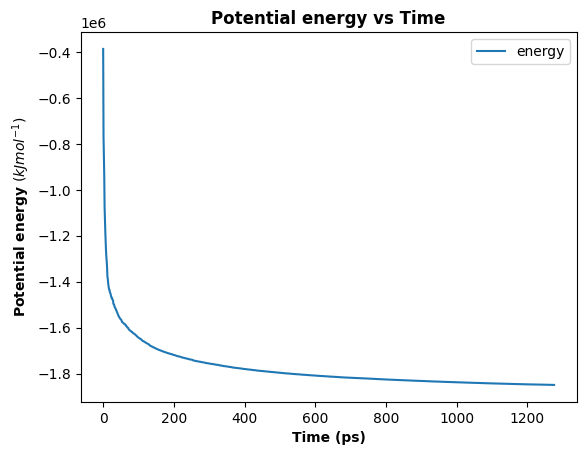

In [14]:
import pandas as pd
df = pd.read_csv('potential.xvg', sep='\s+', header=None, names=['step','energy'])
df.plot('step')
plt.title('Potential energy vs Time', fontweight='bold')
plt.ylabel('Potential energy $(kJmol^{-1})$', fontweight='bold')
plt.xlabel('Time (ps)', fontweight='bold')

# Position restraints 

EM ensured that we have a reasonable starting structure, in terms of geometry and solvent orientation. To begin real dynamics, we must equilibrate the solvent and ions around the protein. If we were to attempt unrestrained dynamics at this point, the system may collapse. The reason is that the solvent is mostly optimized within itself, and not necessarily with the solute, and ions are randomly placed by replacing water molecules.

Remember that posre.itp file that pdb2gmx generated a long time ago? We're going to use it now. The purpose of posre.itp is to apply a position restraining force on the heavy atoms of the protein (anything that is not a hydrogen). Movement is permitted, but only after overcoming a substantial energy penalty. The utility of position restraints is that they allow us to relax our solvent and ions around our protein, without the added variable of structural changes in the protein. The origin of the position restraints (the coordinates at which the restraint potential is zero) is provided via a coordinate file passed to the -r option of grompp. Depending from the protein and ion types, this process may also be in the order nanoseconds.

To use position restraints we need to add "define = -DPOSRES" to the simulation parameter file, .mdp, (more details on the simulation parameters below). Have a look at the .mdp file for this run:

In [15]:
!head -5 nvt.mdp 

title                   = Protein-ligand complex NVT equilibration 
define                  = -DPOSRES  ; position restrain the protein and ligand
; Run parameters
integrator              = md        ; leap-frog integrator
nsteps                  = 10000000     ; 2 * 10000000 = 20 ns


# Equilibration run - temperature

EM ensured that we have a reasonable starting structure, in terms of geometry and solvent orientation. Now the system needs to be brought to the temperature we wish to simulate and establish the proper orientation about the solute (the protein). After we arrive at the correct temperature (based on kinetic energies), we will apply pressure to the system until it reaches the proper density.

Equilibration is often conducted in two phases. The first phase is conducted under an NVT ensemble (constant Number of particles, Volume, and Temperature). This ensemble is also referred to as "isothermal-isochoric" or "canonical." The timeframe for such a procedure is dependent upon the contents of the system. we will conduct a 200-ps NVT equilibration for this exercise. 

In [88]:
!gmx grompp -f nvt.mdp -c min.gro -r min.gro -p topol.top -o nvt.tpr -maxwarn 2

                      :-) GROMACS - gmx grompp, 2018.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

## SLURM Script for GROMACS NVT Simulation with GPU Acceleration

In [36]:
!pwd

/pfs/tc1/project/biocompworkshop/vvarenth/test_demo/test-2


In [62]:
%%bash
cat <<EOT > slurm_nvt.sh
#!/bin/bash 

#SBATCH --job-name="FM" 
#SBATCH --account=biocompworkshop 
#SBATCH --nodes=1
#SBATCH --mem=8G 
#SBATCH --partition=dgx
#SBATCH --ntasks-per-node=8
#SBATCH --gres=gpu:1
#SBATCH --time=10:00:00 
#SBATCH --export=ALL 
#SBATCH --mail-user=vvarenth@uwyo.edu 
#SBATCH --mail-type=START,END,FAIL 
#SBATCH --reservation=biocompworkshop


module use /project/biocompworkshop/ukapoor/codes/packages/
module load gromacs/2022.5
 
mpirun -np 8 gmx_mpi mdrun -v -nb gpu -deffnm nvt # with gpu
# mpirun -np 32 gmx_mpi mdrun -v -deffnm nvt  # without gpu  

EOT

In [ ]:
# printing slurm_nvt.sh
!cat slurm_nvt.sh

### Submitting the NVT job with SLURM

In [89]:
!sbatch slurm_nvt.sh

Submitted batch job 16070276


In [131]:
# Canceling the job, replace <job_id> with your job id
!scancel <job_id>

In [54]:
!scancel 16070264

In [140]:
# Checking the status, replace <job_id> with your job id
!squeue -j <job_id>

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          16070252 beartooth       FM vvarenth  R       1:20      1 b522


In [93]:
!squeue --user vvarenth

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          16070276 beartooth       FM vvarenth  R       0:35      1 bhm06
          16070234 non-inves sys/dash vvarenth  R   11:34:02      1 ondemand1
          16070233 non-inves sys/dash vvarenth  R   11:59:07      1 ondemand1


#### Let's analyze the temperature progression, again using gmx energy:

In [94]:
!echo "Temperature" | gmx energy -f nvt.edr -o temperature.xvg -xvg none -b 20

                      :-) GROMACS - gmx energy, 2018.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

Text(0.5, 0, 'Time (ps)')

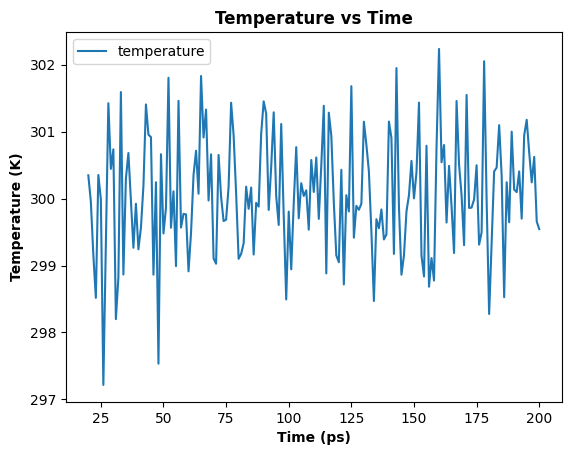

In [95]:
import pandas as pd
df = pd.read_csv('temperature.xvg', sep='\s+', header=None, names=['time','temperature'])
df.plot('time')
plt.title('Temperature vs Time', fontweight='bold')
plt.ylabel('Temperature (K)', fontweight='bold')
plt.xlabel('Time (ps)', fontweight='bold')

## Equilibration run - pressure

The previous step, NVT equilibration, stabilized the temperature of the system. Prior to data collection, we must also stabilize the pressure (and thus also the density) of the system. Equilibration of pressure is conducted under an NPT ensemble, wherein the Number of particles, Pressure, and Temperature are all constant. The ensemble is also called the "isothermal-isobaric" ensemble, and most closely resembles experimental conditions.

The .mdp file used for a 200-ps NPT equilibration can be found here. It is not drastically different from the parameter file used for NVT equilibration. Note the addition of the pressure coupling section. Berendsen barostat is used for this equilibation phase.

Now we'll start an MD simulation just like before - this one will take a few minutes; that's why it is commented out. Go ahead run it if you want to generate your own data.

## SLURM Script for GROMACS NPT Simulation with GPU Acceleration

In [100]:
%%bash
cat <<EOT > slurm_npt.sh
#!/bin/bash 

#SBATCH --job-name="FM" 
#SBATCH --account=biocompworkshop 
#SBATCH --nodes=1
#SBATCH --mem=8G 
#SBATCH --partition=dgx
#SBATCH --ntasks-per-node=8
#SBATCH --gres=gpu:1
#SBATCH --time=10:00:00 
#SBATCH --export=ALL 
#SBATCH --mail-user=vvarenth@uwyo.edu 
#SBATCH --mail-type=START,END,FAIL 
#SBATCH --reservation=biocompworkshop


module use /project/biocompworkshop/ukapoor/codes/packages/
module load gromacs/2022.5

gmx_mpi grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr -maxwarn 2
# mpirun -np 32 gmx_mpi mdrun -v -nb gpu -deffnm nvt
mpirun -np 8 gmx_mpi mdrun -v -nb gpu -deffnm npt # with gpu 
#mpirun -np 2 gmx_mpi mdrun -v -nb gpu -deffnm npt # without gpu


EOT

In [ ]:
!cat slurm_npt.sh

### Submitting the NPT job with SLURM

In [108]:
!sbatch slurm_npt.sh

Submitted batch job 16070281


In [110]:
!scancel 16070281

In [116]:
!squeue --user vvarenth

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          16070234 non-inves sys/dash vvarenth  R   12:33:12      1 ondemand1
          16070233 non-inves sys/dash vvarenth  R   12:58:17      1 ondemand1


### Let's take a look at density as well using energy.

In [117]:
!echo "Density" | gmx energy -f npt.edr -o density.xvg -xvg none

                      :-) GROMACS - gmx energy, 2018.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

Text(0, 0.5, 'Density $(kg \\, m^{-3})$')

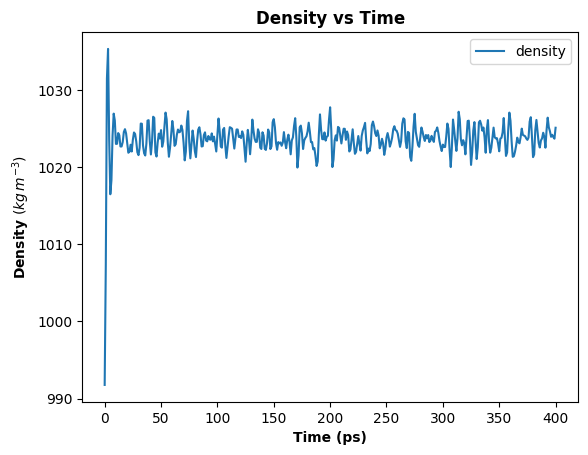

In [118]:
import pandas as pd
df = pd.read_csv('density.xvg', sep='\s+', header=None, names=['time','density'])
df.plot('time')
plt.title('Density vs Time', fontweight='bold')
plt.xlabel('Time (ps)', fontweight='bold')
plt.ylabel('Density $(kg \, m^{-3})$', fontweight='bold')

## PLUMED

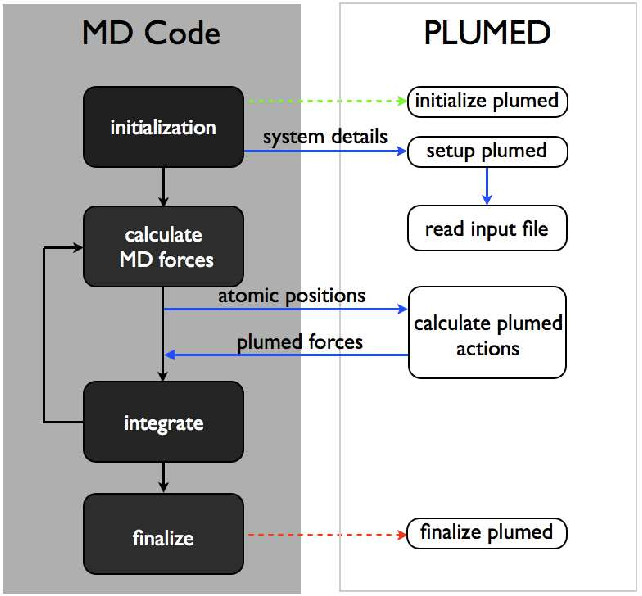

In [7]:
from IPython.display import Image

Image(f"{Image_dir}/14-Figure4-1.png")



Bussi, Giovanni, and Gareth A. Tribello. "Analyzing and biasing simulations with PLUMED." Biomolecular Simulations: Methods and Protocols (2019): 529-578.

PLUMED is an open-source library widely used in the field of molecular dynamics (MD) simulations for implementing enhanced sampling methods, free energy calculations, and other complex analyses of molecular systems. It can be interfaced with a variety of MD codes, such as GROMACS, LAMMPS, AMBER, and NAMD, among others.



**1. Enhanced Sampling Methods:**

**Metadynamics:** Adds a history-dependent bias potential to overcome energy barriers and sample a broader range of configurations.

**Umbrella Sampling:** Applies a bias to sample specific regions of the phase space more efficiently.

**Bias-Exchange Metadynamics:** Combines replica exchange with metadynamics for enhanced sampling.

**Adaptive Biasing Force (ABF):** Computes the free energy surface by applying a force that adapts over time.

**2. Free Energy Calculations:**

**Thermodynamic Integration:** Calculates free energy differences by integrating the average force along a reaction coordinate.

**Free Energy Perturbation:** Estimates free energy changes by perturbing the system and measuring the response.

**Umbrella Integration:** Combines data from multiple umbrella sampling windows to reconstruct free energy surfaces.

**3. Analysis Tools:**

**Collective Variables:** Allows the definition of a wide range of collective variables (CVs) or order parameters that describe the state of the system.

**Path-based Variables:** Defines variables that describe transitions along predefined paths.

**Multidimensional Histogram Analysis:** Analyzes multidimensional data from simulations.
Time Series Analysis: Performs statistical analysis on time series data obtained from simulations.

**Enhanced sampling methods**

Enhanced sampling methods are techniques used in molecular dynamics (MD) simulations to overcome the limitations of conventional sampling, which can struggle to efficiently explore the energy landscape of complex systems. These methods facilitate the exploration of rare events and transitions between different states by improving the sampling efficiency of regions that are otherwise difficult to sample due to high energy barriers or long timescales. Enhanced sampling methods are crucial for obtaining accurate thermodynamic and kinetic properties in simulations.

Enhanced Sampling Methods


1. **Metadynamics**
Metadynamics adds a history-dependent bias potential to the system to discourage revisiting previously sampled configurations. This bias helps the system escape local minima and explore a broader range of configurations.

**Principle:** Gaussian bias potentials are periodically added to the collective variable (CV) space.
Applications: Free energy surface exploration, transition state discovery.

2. **Umbrella Sampling**
Umbrella sampling involves applying a series of bias potentials (umbrellas) to sample different regions of the configurational space more efficiently. Each umbrella samples a specific region, and the results are combined to reconstruct the free energy surface.

**Principle:** The configurational space is divided into overlapping windows, each with a bias potential to sample specific regions.
Applications: Free energy calculations, rare event sampling.

3. **Replica Exchange Molecular Dynamics (REMD)**
REMD uses multiple replicas of the system, each simulated at different temperatures. Periodically, configurations are exchanged between replicas based on a Metropolis criterion, allowing the system to overcome energy barriers.

**Principle:** Configurations are exchanged between replicas to enhance sampling of different regions of phase space.

**Applications:** Protein folding, phase transitions.

4. **Adaptive Biasing Force (ABF)**
ABF calculates and applies a biasing force to the system to flatten the free energy landscape along a chosen reaction coordinate. This helps the system explore the reaction coordinate more uniformly.

**Principle:** The biasing force is adaptively updated to counteract the free energy gradient.
Applications: Free energy calculations, reaction pathways.

5. **Steered Molecular Dynamics (SMD)**
SMD applies an external force to the system to drive it along a predefined path. This method is useful for studying mechanical properties and pulling experiments.

**Principle:** An external force is applied to steer the system along a chosen pathway.
Applications: Ligand unbinding, mechanical unfolding.

6. **Funnel metadynamics** is an advanced enhanced sampling technique used in molecular dynamics (MD) simulations to efficiently explore the free energy landscape of biomolecular systems, particularly for studying processes like ligand binding and unbinding. This method combines metadynamics with a funnel-shaped restraint to focus the sampling within a specific region, typically around a binding site, while reducing unnecessary exploration of other areas.

**Key Concepts of Funnel Metadynamics**

**Metadynamics:**

**Core Idea:** Metadynamics enhances sampling by adding a history-dependent bias potential to the system, which helps it escape local energy minima and explore a wider range of configurations.
Bias Potential: Gaussian hills are added to the collective variable (CV) space periodically, discouraging the system from revisiting previously explored states.
Funnel Restraint:

**Purpose:** The funnel-shaped restraint confines the sampling to a region of interest, such as around a ligand-binding site, thereby making the simulation more efficient.
Structure: The restraint typically consists of a cylindrical section near the binding site that smoothly transitions into a conical section, guiding the ligand towards the binding site and preventing it from drifting away.
**Applications**
Funnel metadynamics is particularly useful for:

**Ligand Binding and Unbinding:** By focusing the sampling around the binding site, funnel metadynamics efficiently explores the binding and unbinding pathways of ligands.

**Free Energy Calculations:** It provides accurate free energy profiles for processes like ligand binding, making it possible to determine binding affinities and kinetics.

**Transition State Exploration:** The method helps identify intermediate states and transition states along the binding or unbinding pathway.

Funnel metadynamics offers several advantages over traditional metadynamics, particularly for studying ligand binding and unbinding processes. These advantages stem from the combination of metadynamics' enhanced sampling capabilities with a funnel-shaped restraint that focuses the sampling effort on regions of interest. 

### How Distance between active site and ligand is chaning with time 

## Collective Variable

In molecular dynamics simulations, we typically consider three types of degrees of freedom: translational, rotational, and vibrational. However, due to high energy barriers, some of these degrees of freedom may not be adequately sampled within a given time frame during conventional simulations. To address this limitation, enhanced sampling techniques are employed. One common approach is to introduce an external bias potential that specifically targets the slow degrees of freedom, thereby facilitating more efficient sampling.

**Criteria for CVs** 

1. **Distinguish Between Initial and Final States and Describe Relevant Intermediates**:
   - They should clearly differentiate between the initial and final states of the system.
   - They should capture all significant intermediate states during the transition process.

2. **Include All Slow Modes of the System**:
   - They should encompass the slowest and most significant modes of motion.
   - These modes are often the rate-limiting steps in the process.

3. **Limited in Number**:
   - The number of CVs should be minimized to avoid overcomplicating the simulation.
   - Only the most relevant degrees of freedom should be included.

https://www.plumed.org/doc-v2.7/user-doc/html/masterclass-21-4.html

https://wires.onlinelibrary.wiley.com/doi/pdf/10.1002/wcms.31

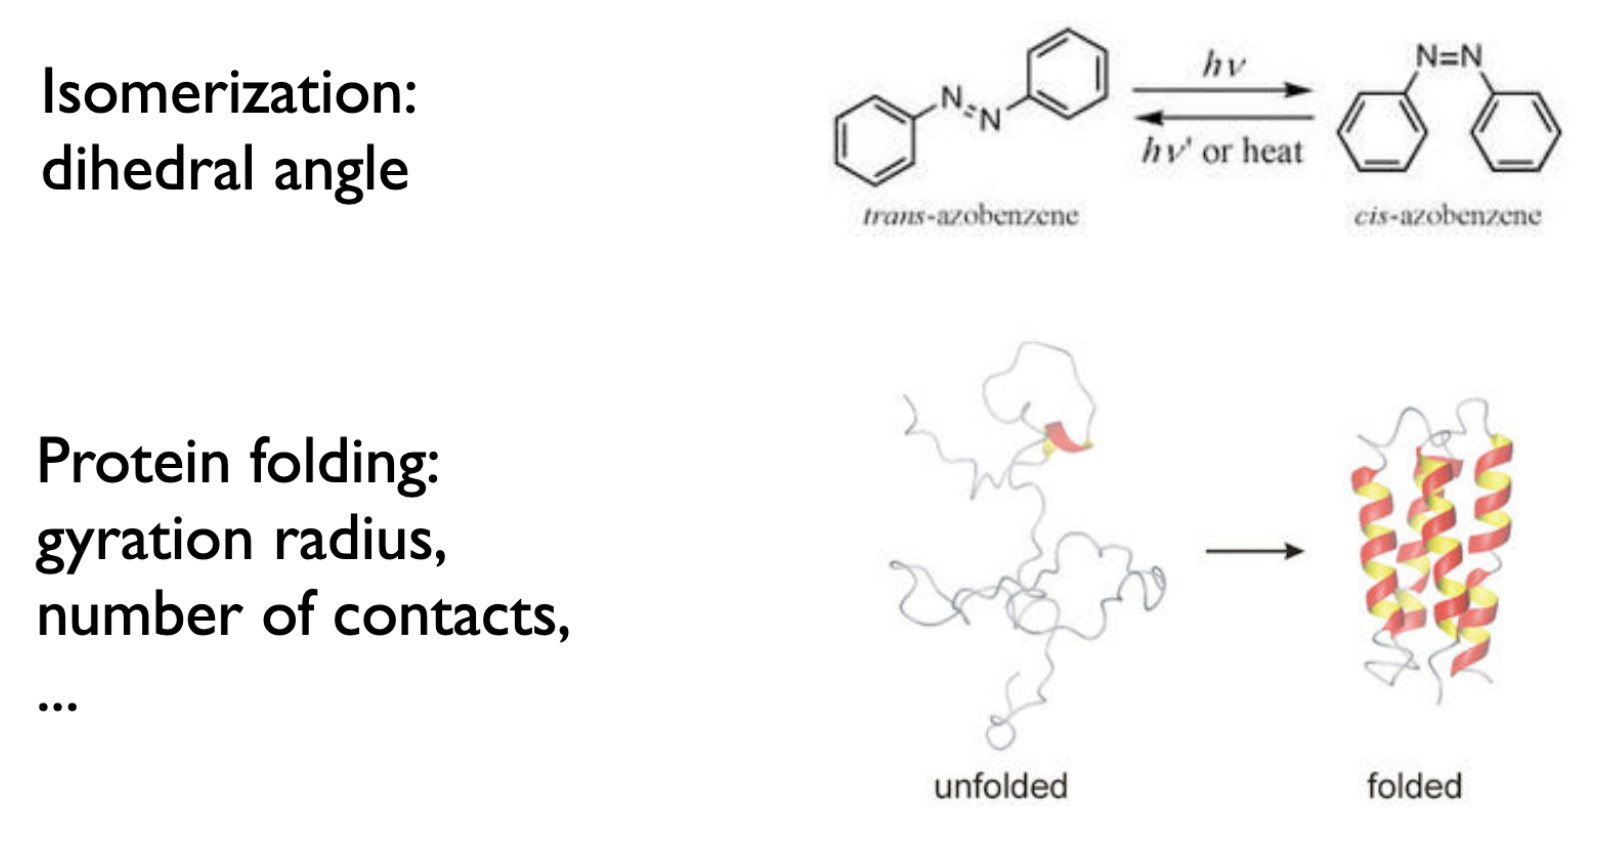

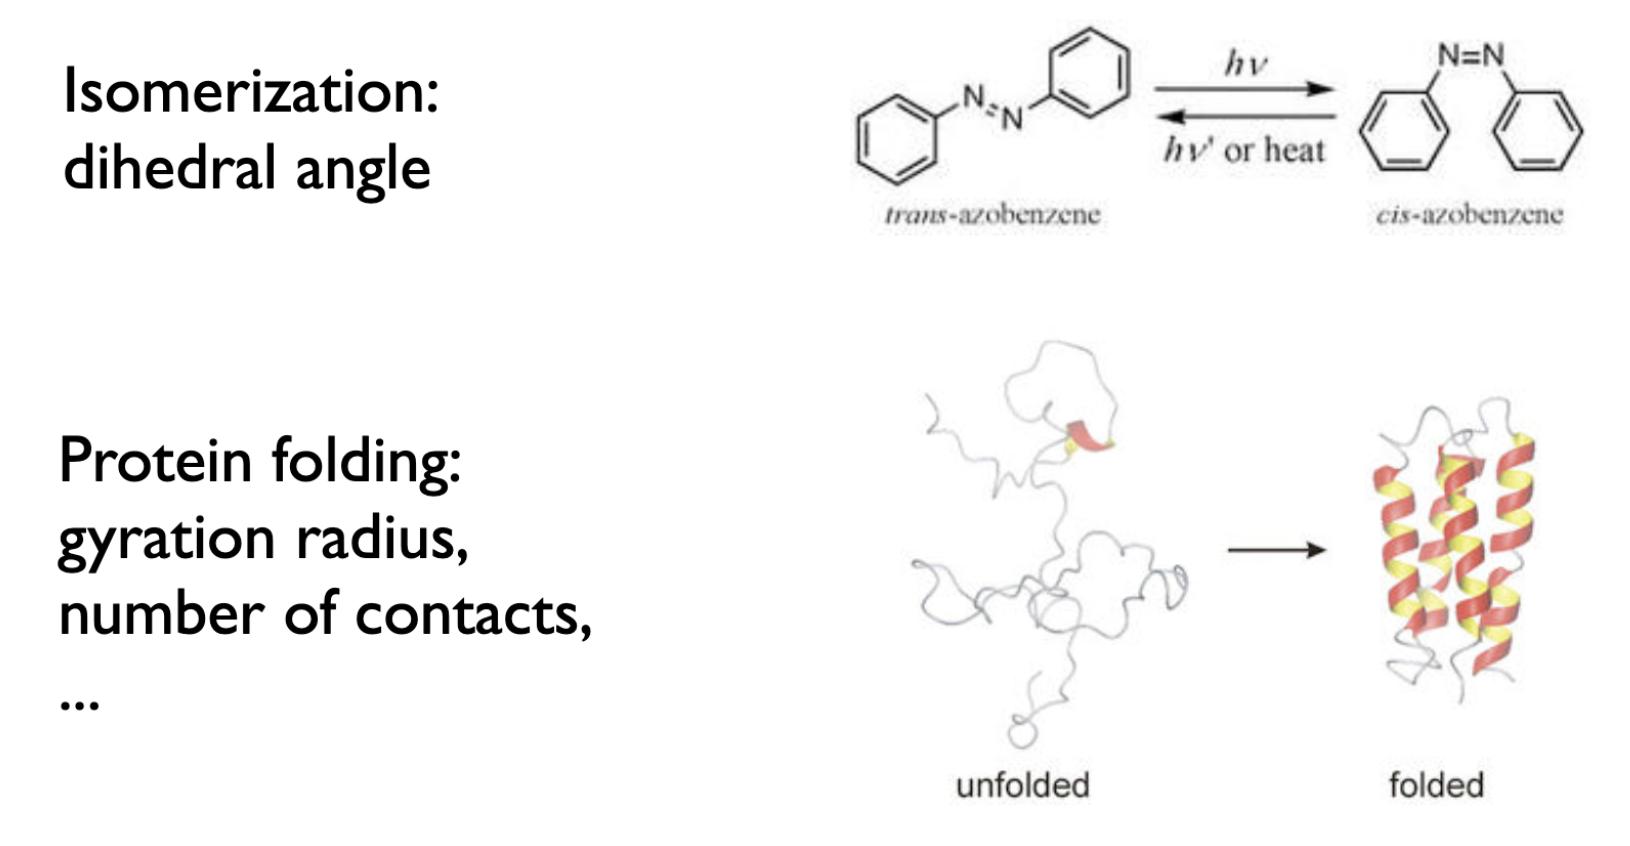

In [9]:
from IPython.display import Image

Image(f"{Image_dir}/CV.png")

### Coming back to our system

#### Checking how the distance between the ligand and the active site is changing.


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\A'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_269537/4154669625.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('D0.dat', sep='\s+', header=None, names=['time', 'Distance'])
/tmp/ipykernel_269537/4154669625.py:13: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel('Distance ($\AA$)', fontweight='bold')


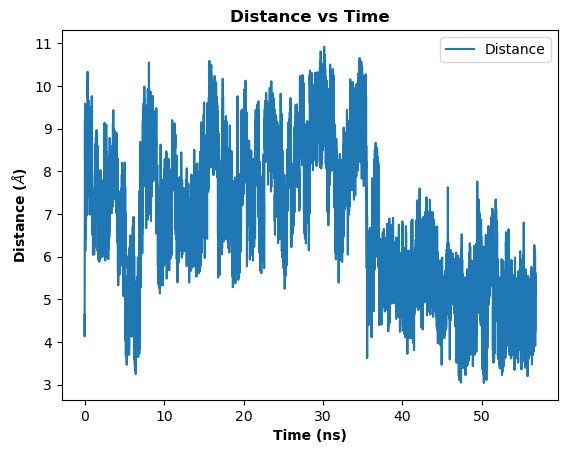

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data D0
df = pd.read_csv('D0.dat', sep='\s+', header=None, names=['time', 'Distance'])
df['time'] = df['time'] * 2000 * 2 / 1000000 # converting ps to ns 
# Plot the data
df.plot(x='time', y='Distance')

# Add title and labels
plt.title('Distance vs Time', fontweight='bold')
plt.xlabel('Time (ns)', fontweight='bold')
plt.ylabel('Distance ($\AA$)', fontweight='bold')

# Show the plot
plt.show()


### Funnel Meta 

#### Funel Restraint Setup

#### **Step 1**

1. **Open VMD**.
   - Open your terminal in ARCC and perform the following comamnds
   ```bash
   1. module use /project/biocompworkshop/ukapoor/codes/packages/
   2. module load vmd/1.9.4a57
   3. vmd
   ```
2. Go to the **Extensions** menu.
3. Click on **Tk Console**.
4. In the Tk Console, type the following command:
   ```tcl
   source tooltip.tcl
   ```
5. Then, type the next command:
   ```tcl
   source funnel.tcl
   ```
6. Finally, type the command:
    ```tcl
   funnel_tk
    ```

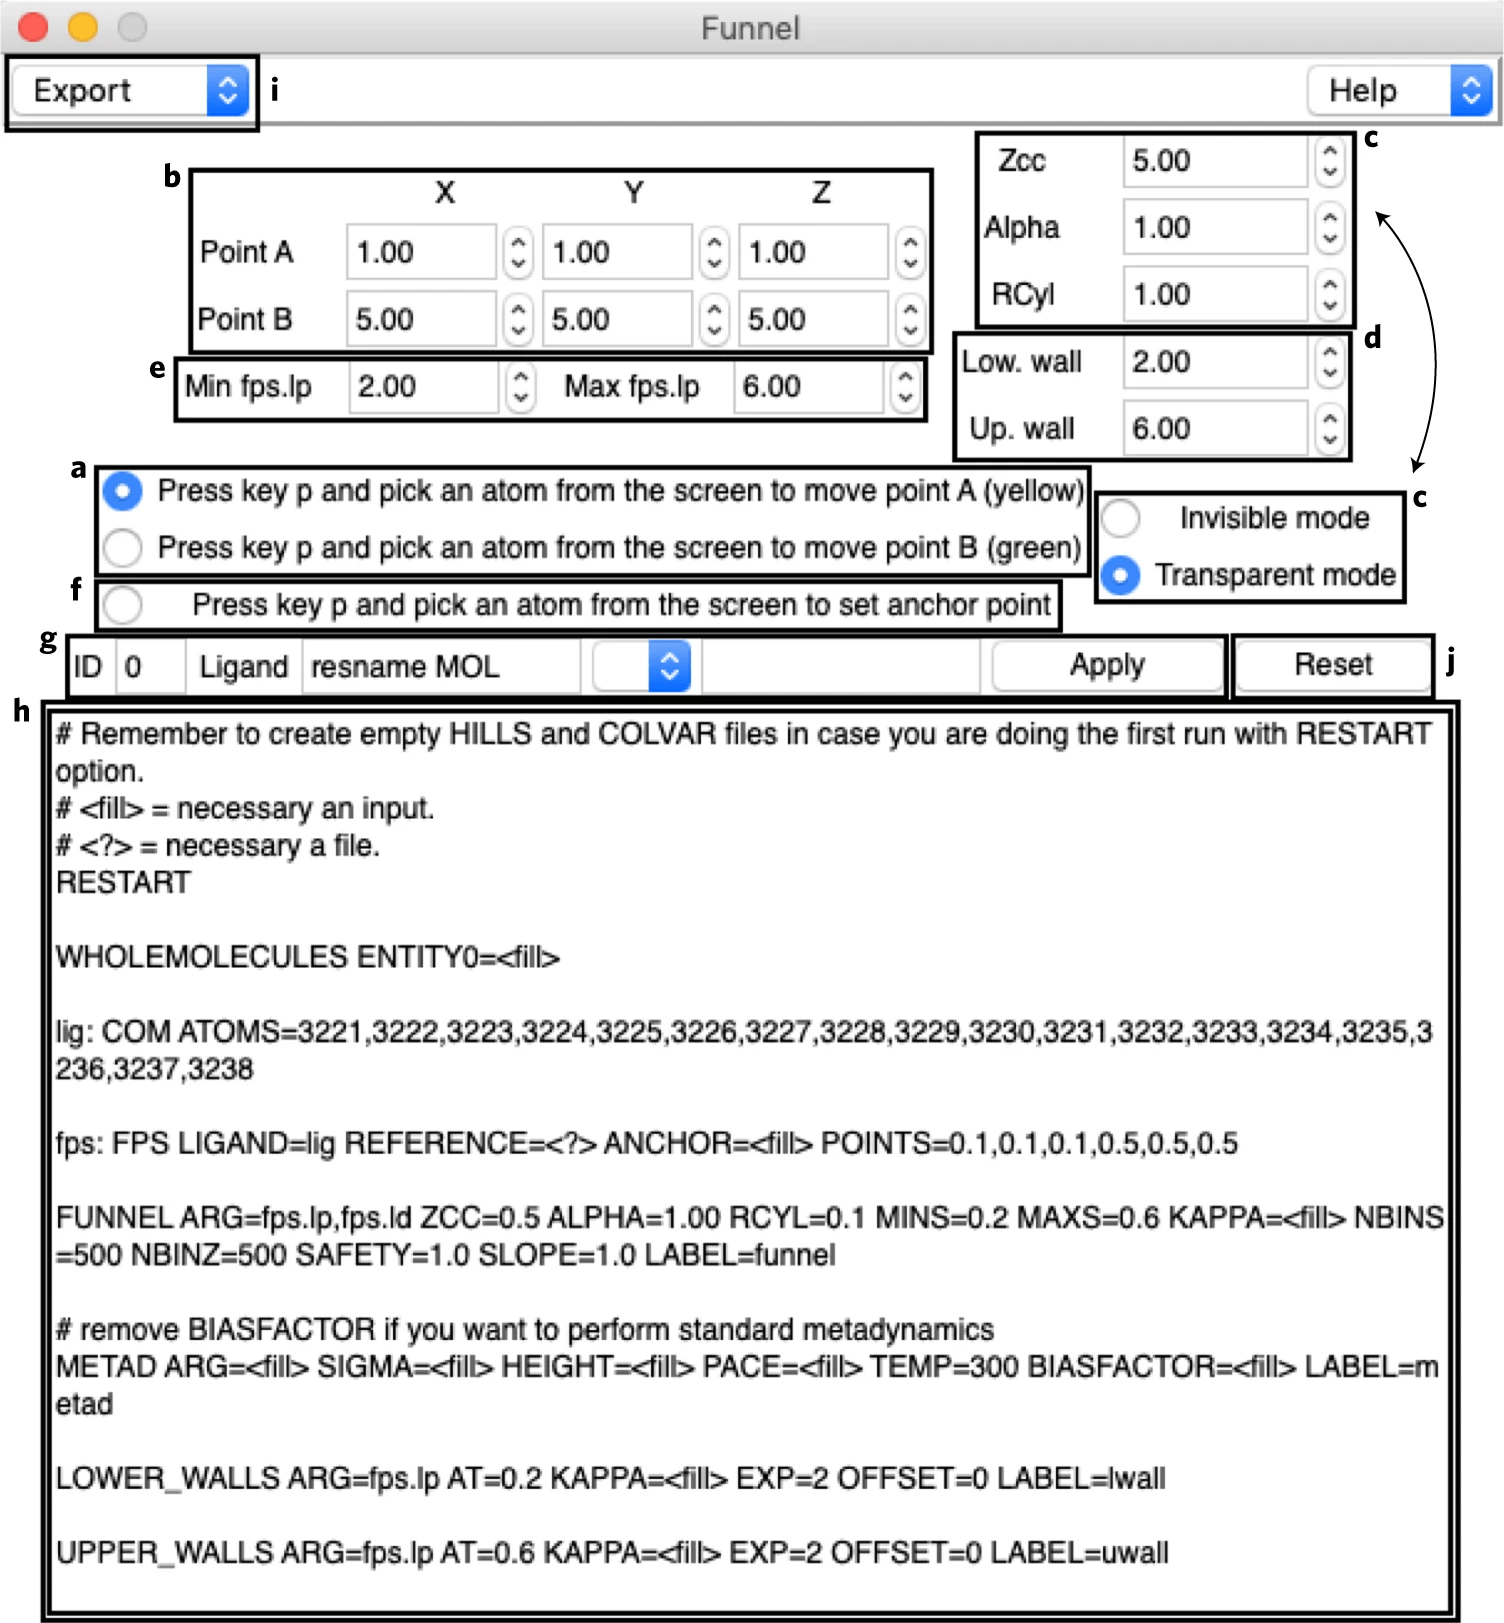

In [11]:
from IPython.display import Image

Image(f"{Image_dir}/funnel-1.png")

#### **Step 2**

1. **Interactive Position Adjustment  (a)**:
   - Use the option keys to change the positions of points A and B interactively.

2. **Coordinate Display and Editing (b)**:
   - Boxes display the current coordinates of points A and B. Editing these values or using the arrows will change the position and orientation of the funnel potential.

3. **Customizing the Funnel Potential (c)**:
   - Adjust the funnel potential shape on the target structure by changing:
     - The switching point from the cone to the cylinder section (`zcc`) in Å.
     - The angle defining the cone section's amplitude in radians.
     - The cylinder section's radius (`RCyl`) in Å.
   - Toggle between invisible and transparent visualization modes to optimize the funnel position.

4. **Projection Constraints (d)**:
   - Apply lower and upper walls to the projection of the ligand’s center of mass (COM) along the funnel axis 

5. **Projection Limits (e)**:
   - `Min fps.lp` and `Max fps.lp` represent the minimum and maximum projections of the ligand’s COM along the funnel axis, used to generate the funnel-shaped potential (file `BIAS`; Step 20).

6. **Anchor Point Setting (f)**:
   - Set an anchor point on the target structure to avoid issues with periodic boundary conditions (PBC) during the simulation. This point should be as close to the ligand as possible (Step 10).

7. **PLUMED Input Preparation (g)**:
   - Use the drop-down menu to select several options to prepare the PLUMED input file. Each option is reported in the PLUMED input displayed in the canvas below, using PLUMED-2's format and units of measure (Steps 11–14).

8. **PLUMED Input Example (h)**:
   - An example of PLUMED input is provided. Scroll down with the mouse to read the full text and modify it as needed. For example, in our case, we added a distance collective variable (`d1`) (Step 15).

9. **Saving the PLUMED Input (i)**:
   - Save the PLUMED input to a file using the ‘Export’ drop-down menu (Step 16).

10. **Reset Option (j)**:
    - Use the reset option to return the GUI to its default values.

The task is to adjust the position of the funnel potential (shown in orange) on a target structure by changing the coordinates of points A (shown in yellow) and B (shown in green), which define the axis of the funnel. You can modify these points by either clicking on atoms in the visualization window or by typing their Cartesian coordinates. To select atoms, use the provided options, click on the visualization window, press 'p', and then pick an atom. The funnel will adjust accordingly. Alternatively, you can directly input the coordinates of points A and B in the designated boxes or use arrows to increment or decrement their Cartesian coordinates by 0.1 Å. Press 'Enter' to confirm the changes.

Adjust the 'Zcc' value, which determines the transition point between the cone and cylinder regions of the funnel, and then press 'Enter'. Ensure that the cone region encompasses the binding site, including all residues surrounding it, to thoroughly explore the binding site by the ligand. Note that the funnel potential acts on the center of mass (COM) of the ligand, so as long as the ligand's COM remains within the orange volume, even large ligands can have parts of their structure outside the funnel without experiencing repulsion.

Adjust the 'Alpha' parameter, which determines the size of the cone section in radians, and then press 'Enter'. Increasing this value expands the explored region of the binding site.

Adjust the 'RCyl' parameter, which represents the radius of the cylinder section in the unbound region, and then press 'Enter'. By default, the radius is set to 1 Å. Generally, there's no need to modify this value. A larger radius increases the volume for exploration by the ligand in its unbound state, leading to longer computational time.


Set the 'Low. Wall' value and press 'Enter'. This value represents the minimum point that can be sampled as the projection of the ligand's center of mass (COM) along the funnel axis. At this value, an external potential is applied to guide the ligand's COM to explore higher positions. A value of 0 corresponds to point A, and negative values allow deeper exploration into the binding site, while positive values limit exploration closer to the unbound state. This parameter is optional and can be set by the user to restrict sampling within the bound state. A red sphere in the visualization window indicates its position relative to points A and B. If the binding mode is unknown, 'Low. Wall' should be set to ensure thorough exploration of the binding site.


Set the 'Up. Wall' value and press 'Enter'. This value represents the highest point sampled as the projection of the ligand's center of mass (COM) along the funnel axis. Similar to 'Low. Wall', an external potential is applied at this value, guiding the ligand's COM to explore lower positions. However, 'Up. Wall' operates in the unbound state, unlike 'Low. Wall' which operates in the bound state. 'Up. Wall' is mandatory and is set to limit sampling in the unbound state (cylinder section), aiding faster convergence and saving computational time. To ensure an accurate free-energy estimate of the unbound state, 'Up. Wall' should allow the ligand to explore distances beyond the cutoff value of non-bonded long-range interactions. It is defined as the distance in Å from point A, with a red sphere in the visualization window indicating its position relative to points A and B. 'Up. Wall' does not affect sampling in the bound region but defines the maximum distance sampled by the ligand in the bulk, ensuring that all ligand atoms are distant from any protein atom beyond the cutoff value of short-range interactions (typically 10 to 15 Å) defined in the simulation input file.

Adjust the 'Min fps.lp' value and press 'Enter'. The system cannot explore states with values of the ligand's center of mass (COM) projection along the funnel axis lower than 'Min fps.lp'. Therefore, set 'Min fps.lp' to be at least 0.5 Å lower than the 'Low. Wall' value.

Adjust the 'Max fps.lp' value and press 'Enter'. The system cannot explore states with values of the ligand's center of mass (COM) projection along the funnel axis higher than 'Max fps.lp'. Therefore, set 'Max fps.lp' to be at least 0.5 Å higher than the 'Up. Wall' value.

Select the option to set the anchor point and click on the visualization window of VMD. Then press the 'p' key and choose an atom from the target structure that is as close as possible to the ligand in both the bound and unbound states. This step doesn't affect the quality of the results but helps avoid technical issues related to periodic boundary conditions during the simulation.

Enter the VMD identification number of the structure you loaded in the box to the right of 'ID' (Fig. 3g). You can find this number on the left side of the VMD main menu where the structure file of the system is loaded.

Enter the selection of atoms that identifies the ligand molecule using the VMD syntax in the box to the right of 'Ligand'. For example, you can use commands like 'resid 120 to 140' to specify the ligand.

Select the desired simulation parameters from the drop-down menu and enter the corresponding value for each parameter in the box to the right. Afterward, press 'Enter' and then 'Apply' to update the PLUMED input with the new data. The values used for the simulation presented in the 'Anticipated results' section are provided in parentheses and in Table 2. These values can serve as starting settings unless the user possesses experience with metadynamics and has specific structural and energetic information about the system under investigation. A brief description of all parameters is provided below.

- **wholemolecules**: Defines groups of atoms not to be split by periodic boundary conditions. Use VMD syntax to select atoms (e.g., 'protein and name CA and structure H E' and 'resid 20 to 100').

- **reference**: Specifies the file for aligning the target structure when adding metadynamics bias to the system. Enter the file name created at Step 18.

- **k_funnel**: Sets the spring constant for the funnel-shape restraint potential in kJ/(mol·nm^2) (e.g., 35,100).

- **arg_meta**: Specifies the collective variable (CV) to which metadynamics Gaussian functions are added during funnel metadynamics (e.g., fps.lp).

- **sigma_meta**: Sets the width of metadynamics Gaussian functions (e.g., 0.01).

- **height_meta**: Sets the height of metadynamics Gaussian functions in kJ/mol (e.g., 2.0).

- **pace_meta**: Sets the deposition stride of metadynamics Gaussian functions in simulation steps (e.g., 500).

- **biasfactor**: Sets the bias factor, rescaling Gaussian function heights for well-tempered metadynamics (e.g., 15).

- **grid_min**: Sets the lowest value to sample in CV space (e.g., 0 for distance, '-pi' for torsion).

- **grid_max**: Sets the highest value to sample in CV space (e.g., max value defined in max fps.lp, '+pi' for torsion).

- **grid_bin**: Sets binning of the grid for each CV, usually defined as (grid_max – grid_min) / sigma_meta * 5.

- **rct_ustride**: Sets the deposition stride of metadynamics Gaussian functions before updating the reweighting grid. Default is 1, increase only if simulation is slow.

- **k_uwall**: Sets spring constant for 'Up. Wall' in kJ/(mol·nm^2) (e.g., 35,100).

- **k_lwall**: Sets spring constant for 'Low. Wall' in kJ/(mol·nm^2) (e.g., 35,100).

Ensure all '<fill>' and '<?>' fields in the PLUMED input are filled. The 'WHOLEMOLECULES' flag is optional and can be commented by adding '#' at the beginning of the line.

Click 'Export' and then 'Export for Plumed' to generate a PLUMED input file containing the text displayed in the GUI. This action ensures that the configured parameters are saved and ready for use in the PLUMED software.

To create the reference PDB file from the target structure for setting up the funnel-shape potential:

1. Use VMD or any other molecular visualization software capable of saving a three-dimensional structure as a PDB file.

2. Ensure that the PDB file contains only atoms of the target molecule or a selection of atoms from the target molecule.

3. It is recommended to include only the backbone atoms of secondary structures such as alpha helices and beta sheets.

4. Save the structure as a PDB file. In VMD, you can do this by selecting 'File' > 'Save Coordinates' or a similar option depending on the software.

5. This PDB file will be utilized for aligning the target structure when adding the metadynamics bias to the system.

#### Step 3
**Sample PLUMED Configuration file**

```tcl
WHOLEMOLECULES ENTITY0=5,16,23,41,53,63,82,101,113,129,148,162,181,197,211,218,233,248,258,276,288,295,306,332,344,368,385,401,412,431,448,460,482,496,503,523,540,560,570,577,584,595,614,633,647,662,676,700,716,732,746,756,766,783,793,800,816,830,844,855,867,883,899,915,925,932,947,967,979,996,1003,1014,1025,1036,1051,1073,1092,1109,1131,1150,1172,1191,1201,1223,1239,1259,1281,1295,1306,1328,1349,1363,1374,1393,1407,1426,1440,1454,1466,1485,1499,1518,1537,1559,1578,1589,1603,1613,1623,1634,1654,1665,1682,1696,1712,1723,1733,1749,1760,1781,1793,1804,1814,1825,1837,1849,1869,1879,1889,1896,1910,1924,1935,1951,1965,1979,1986,2010,2017,2036,2050,2074,2098,2108,2122,2138,2150,2162,2186,2205,2222,2239,2249,2260,2281,2293,2312,2331,2342,2356,2370,2384,2394,2416,2438,2459,2483,2490,2504,2526,2545,2567,2579,2589,2606,2625,2635,2645,2652,2662,2673,2680,2696,2707,2718,2728,2745,2752,2764,2775,2782,2791,2803,2822,2838,2849,2871,2893,2907,2914,2924,2948,2962,2981,3093,2997,3004,3023,3039,3050,3074,3081,3103,3117,3127,3138,3152,3163,3179,3191,3198,3214,3235,3245,3269,3285,3299,3309,3328,3344,3358,3382,3398,3415,3432,3446,3465,3475,3485,2490,3502,3504,3508,3509,3510,3511,3514,3516,3519,3522,3523,3524,3525,3528,3530,3533,3536,3537,3538,3540,3542,3545,3546,3548,3550,3552,3554,3556,3557

lig: COM ATOMS=3502,3504,3508,3509,3510,3511,3514,3516,3519,3522,3523,3524,3525,3528,3530,3533,3536,3537,3538,3540,3542,3545,3546,3548,3550,3552,3554,3556,3557

fps: FUNNEL_PS LIGAND=lig REFERENCE=ref22.pdb ANCHOR=2490 POINTS=7.104,7.068,5.978,8.11,6.99,5.423

FUNNEL ARG=fps.lp,fps.ld ZCC=1.5 ALPHA=0.6 RCYL=0.1 MINS=-1 MAXS=5 KAPPA=35100 NBINS=500 NBINZ=500 FILE=BIAS LABEL=funnel WALKERS_MPI

D0: DISTANCE ATOMS=2769,3535

# remove BIASFACTOR if you want to perform standard metadynamics
METAD ARG=D0 SIGMA=0.1 HEIGHT=2 PACE=500 TEMP=300 BIASFACTOR=18 GRID_MIN=-10 GRID_MAX=50 GRID_WFILE=grid_w.dat GRID_WSTRIDE=250000 WALKERS_MPI

LOWER_WALLS ARG=fps.lp AT=-0.2 KAPPA=500000 EXP=2 OFFSET=0 LABEL=lwall

UPPER_WALLS ARG=fps.lp AT=4.5 KAPPA=500000 EXP=2 OFFSET=0 LABEL=uwall

UPPER_WALLS ARG=D0 AT=4.3 KAPPA=500000 EXP=2 OFFSET=0 LABEL=uwall_D0

PRINT STRIDE=1 ARG=* FILE=COLVAR

```

#### Step 4 - Submitting the Job. Since it is a longer run, we are going to submit the job via SLURM.

In [127]:
%%bash
cat <<EOT > slurm_plumed.sh
#!/bin/bash 

#SBATCH --job-name="FM" 
#SBATCH --account=biocompworkshop 
#SBATCH --nodes=1
#SBATCH --mem=8G 
#SBATCH --partition=dgx
#SBATCH --ntasks-per-node=8
#SBATCH --gres=gpu:1
#SBATCH --time=10:00:00 
#SBATCH --export=ALL 
#SBATCH --mail-user=vvarenth@uwyo.edu 
#SBATCH --mail-type=START,END,FAIL 
#SBATCH --reservation=biocompworkshop


module use /project/biocompworkshop/ukapoor/codes/packages/
module load gromacs/2022.5

gmx_mpi grompp -f md.mdp -c npt.gro -r npt.gro -t npt.cpt -p topol.top -o md.tpr -maxwarn 2
# mpirun -np 32 gmx_mpi mdrun -v -nb gpu -deffnm nvt
mpirun -np 8 gmx_mpi mdrun -v -nb gpu -deffnm md -plumed plumed.dat

EOT

In [ ]:
!cat slurm_plumed.sh

In [129]:
!sbatch slurm_plumed.sh

Submitted batch job 16070287


In [136]:
!scancel 16070287

In [139]:
!squeue --user vvarenth

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          16070234 non-inves sys/dash vvarenth  R   12:42:42      1 ondemand1
          16070233 non-inves sys/dash vvarenth  R   13:07:47      1 ondemand1


#### Step 5 - Analysis

1. **Open VMD**.
   - Open your terminal in ARCC and perform the following comamnds
   ```bash
   1. module use /project/biocompworkshop/ukapoor/codes/packages/
   2. module load vmd/1.9.4a57
   3. vmd
   ```
2. Go to the **Extensions** menu.
3. Click on **Tk Console**.
4. In the Tk Console, type the following command:
   ```tcl
   source tooltip.tcl
   ```
5. Then, type the next command:
   ```tcl
   source ffs.tcl
   ```
6. Finally, type the command:
    ```tcl
   ffs_tk
    ```

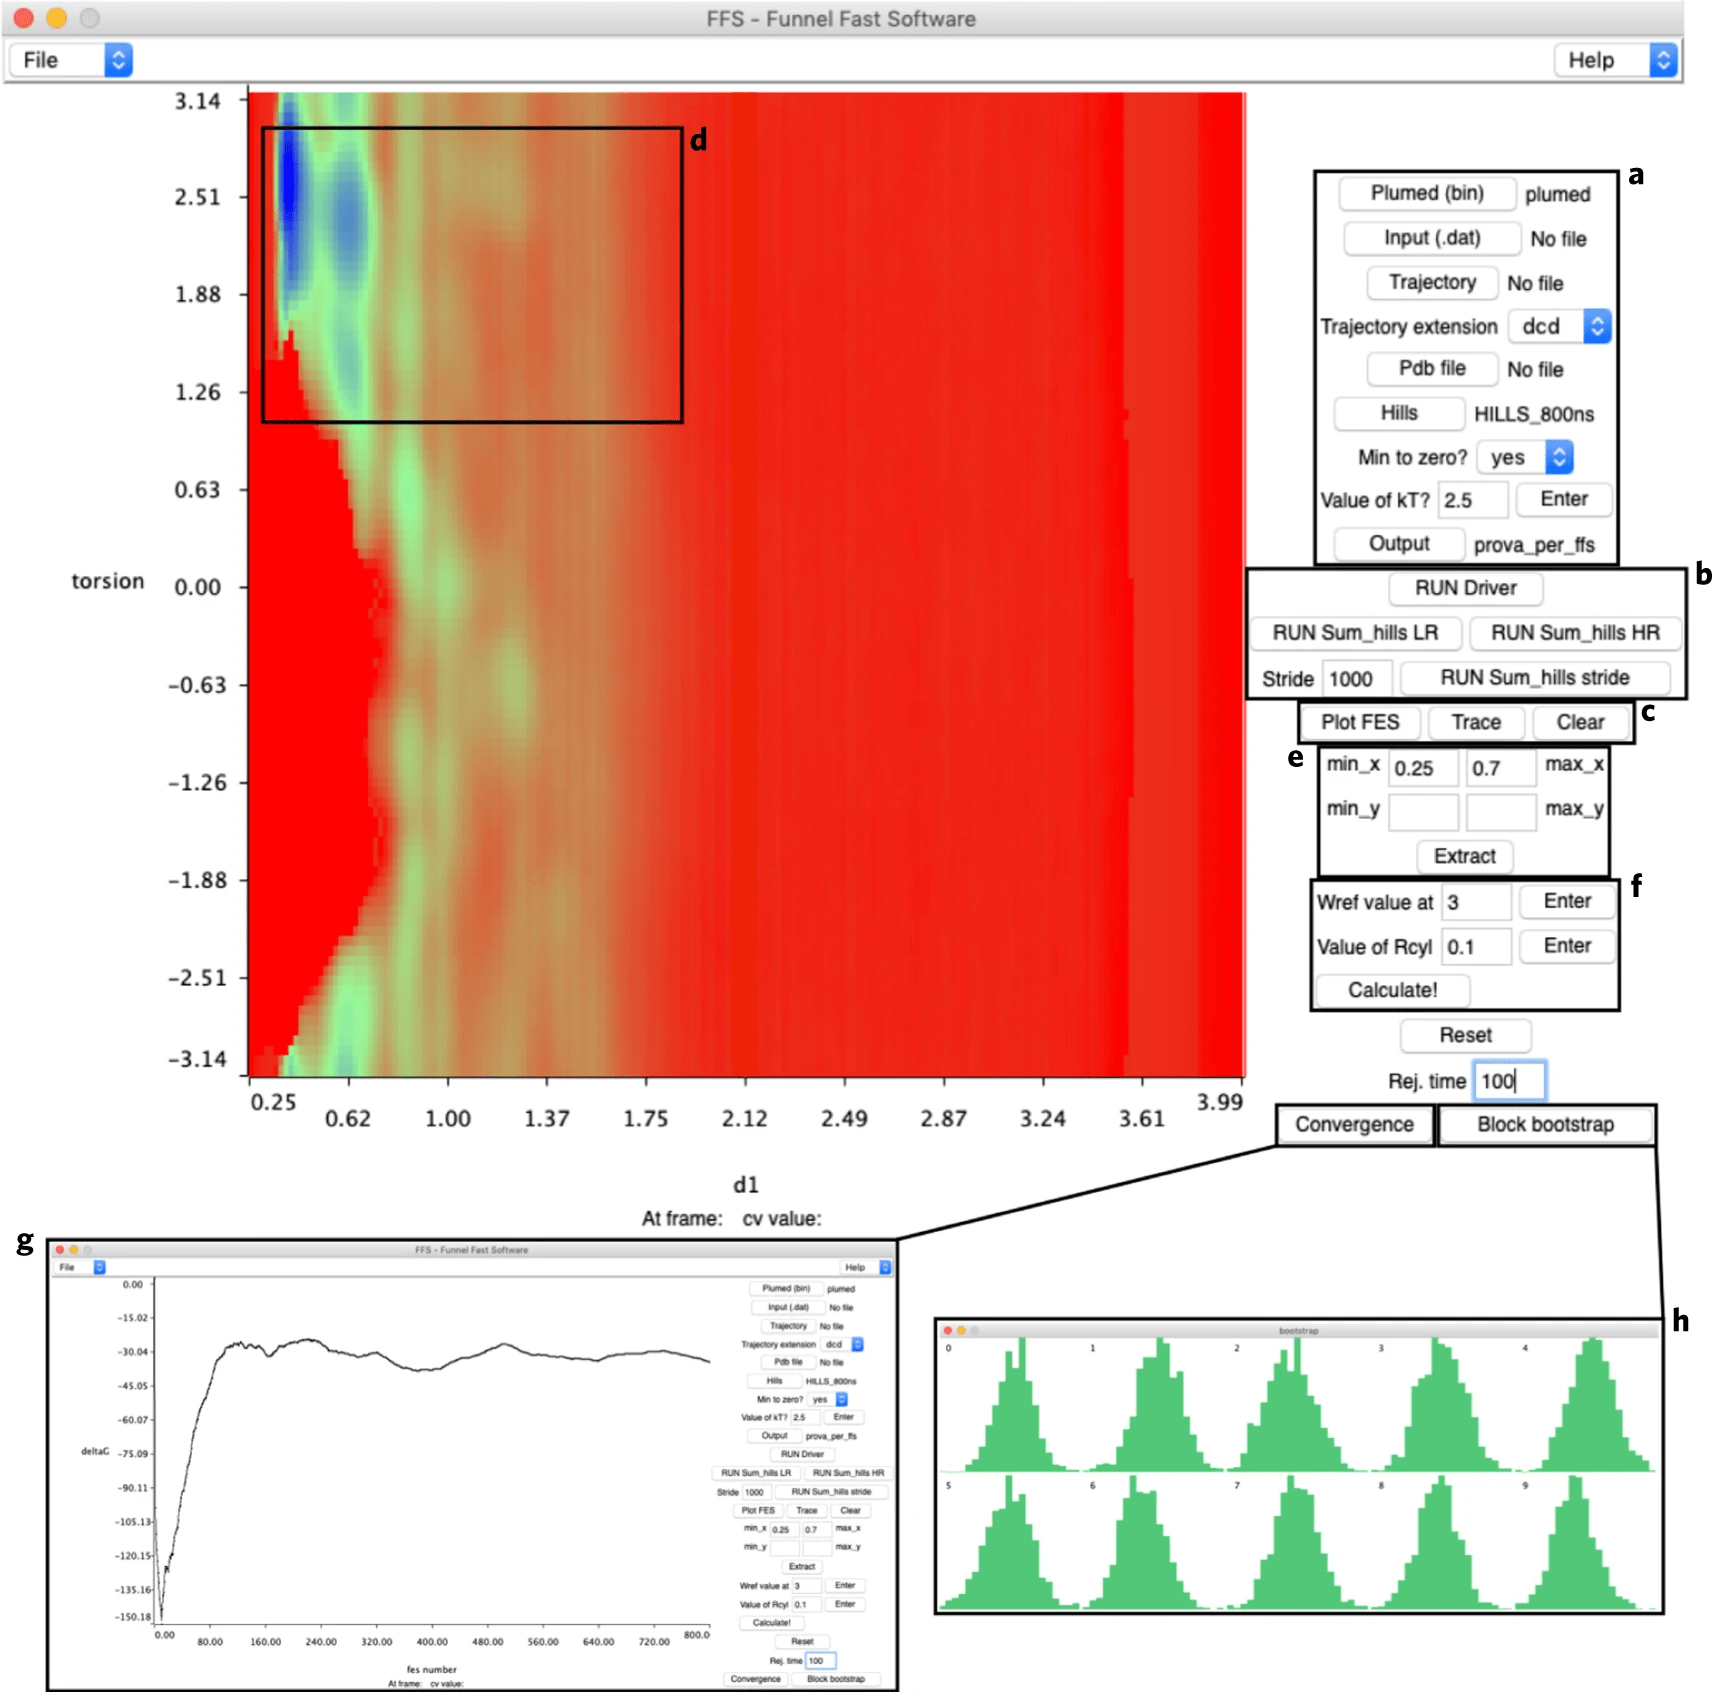

In [12]:
from IPython.display import Image

Image(f"{Image_dir}/funnel-2.png")

#### Step 5

a. **Loading Files**:
   - Use commands to load the PLUMED binary (`plumed`), the PLUMED input file, the PDB file, and the trajectory file of the system.

b. **Running Analysis Tools**:
   - Use the commands to run `Sum_hills` with both small and large bin sizes (`RUN Sum_hills LR` and `RUN Sum_hills HR`, respectively) and the `Driver` tool.

c. **Plotting Trajectory Frames**:
   - The `Trace` button allows plotting the position of each frame of the simulation trajectory on the BFES.

d. **Extracting Structures**:
   - Hold the right mouse button to draw a selection area on the BFES. This extracts the structures belonging to the selected region as PDB files.

e. **Defining Selections**:
   - Alternatively, define a selection using the boxes and press `Extract` to obtain the structures.

f. **Calculating Binding Free Energy**:
   - Calculate the absolute protein-ligand binding free energy with one click. This requires selecting the bound state and the unbound state using the min and max boxes and the `Wref value at` box, respectively. The final value includes an entropic correction due to the funnel-shaped potential in the unbound state. Use the `Reset` button to return the GUI to default values.

g. **Time-Weighted Binding Free Energy**:
   - Repeat the command from step f for each BFES generated by the `RUN Sum_hills stride` command. This provides a time-weighted estimate of the ligand binding free energy and its standard deviation. A plot of the absolute binding free energy as a function of simulation time is produced. The final value includes an entropic correction due to the funnel-shaped potential in the unbound state. Each binding free energy value computed for the BFES is reported in the `tk_console`.

h. **Free-Energy Convergence Check**:
   - Check the free-energy convergence using block bootstrap analysis. By clicking `Block bootstrap`, the simulation frames are divided into ten non-overlapping blocks. The mean binding free energy and standard error for each block are computed. A Gaussian-like histogram representation of the binding free-energy distribution for each block is displayed.


In [6]:
data = plumed.read_as_pandas("./FM-out/fes_937.dat")
data

/tmp/ipykernel_3111381/1174661978.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  data = plumed.read_as_pandas("./FM-out/fes_937.dat")
/tmp/ipykernel_3111381/1174661978.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = plumed.read_as_pandas("./FM-out/fes_937.dat")


,D0,file.free,der_D0
0,0.194862,-0.000000e+00,-0.000000
1,0.198395,-2.222410e-02,-14.422660
2,0.201929,-1.447987e-01,-65.254315
3,0.205462,-5.853214e-01,-200.376547
4,0.208996,-1.753161e+00,-495.539179
...,...,...,...
1512,5.537366,-1.826268e+00,597.891637
1513,5.540900,-5.010375e-01,206.062039
1514,5.544433,-8.993728e-02,53.089657
1515,5.547967,-5.878030e-03,6.125133


In [7]:
data.columns

Index(['D0', 'file.free', 'der_D0'], dtype='object')

In [13]:
data['file.free']

0      -0.000000e+00
1      -2.222410e-02
2      -1.447987e-01
3      -5.853214e-01
4      -1.753161e+00
            ...     
1512   -1.826268e+00
1513   -5.010375e-01
1514   -8.993728e-02
1515   -5.878030e-03
1516   -2.210000e-07
Name: file.free, Length: 1517, dtype: float64

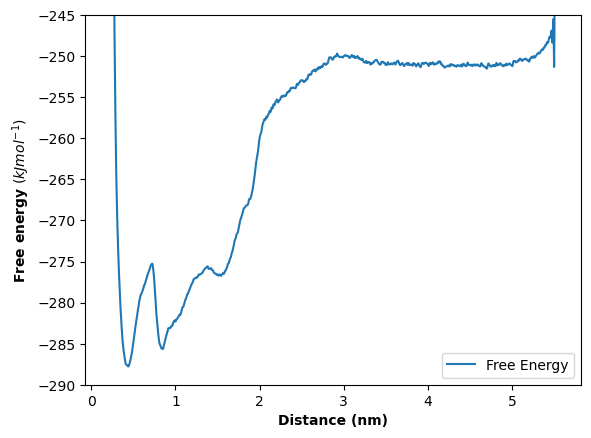

In [18]:
# plot time serie of gyration radius (r) and distance (d)
plt.plot(data.D0, data['file.free'], label="Free Energy")
# plt.plot(data.time,data.d, label="distance")
# x-y axis labels
plt.ylabel("Free energy $(kJmol^{-1})$", fontweight='bold')
plt.xlabel("Distance (nm)", fontweight='bold')
plt.ylim(-290, -245)
plt.legend()